In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# Read in data
general_heights = pd.read_csv("../Resources/general_heights.csv")

wba_data = pd.read_csv("../Resources/wba_data.csv")

wba_data.head()

,name,position,age,height
0,Matee Ajavon,G,28,68
1,Swin Cash,F,34,73
2,Erika de Souza,F,32,77
3,Celine Dumerc,G,31,66
4,Nadia Gomes Colhado,C,25,76


In [5]:
wba_heights = wba_data.iloc[:, -1]

In [6]:
# Run the t-test
(t_stat, p) = stats.ttest_ind(general_heights, wba_heights, equal_var=False)

In [7]:
# Report the data
print("The mean height of WBA players is {}.".format(wba_heights.mean()))
print("The mean height of women sampled is {}.".format(
    general_heights.values.mean()))

print("p is {}.".format(p[0]))
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The mean height of WBA players is 72.32.
The mean height of women sampled is 64.68416666666667.
p is 3.147413627696938e-33.
The difference in sample means is significant.


In [8]:
# Plot sample means with error bars
tick_labels = ["General Public", "WBA Players"]

means = [general_heights.mean().values[0], wba_heights.mean()]
x_axis = np.arange(0, len(means))

sem = [general_heights.sem().values[0], wba_heights.sem()]

<IPython.core.display.Javascript object>


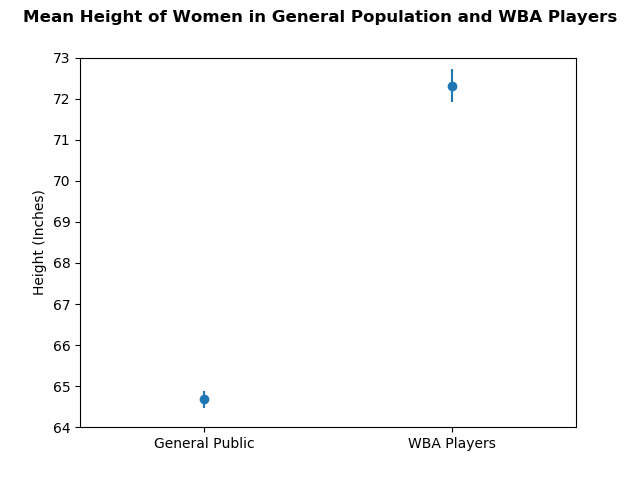

In [9]:
# Plot mean height of players
fig, ax = plt.subplots()

fig.suptitle("Mean Height of Women in General Population and WBA Players",
             fontsize=12, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(64, 73)

ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Height (Inches)")

plt.show()